# 📷 Image Classification on Cat vs Dog with VGG16 🧠 | A Step-by-Step Guide 🚀

**Author**: Muhammad Hassan Saboor  
**Role**: Data Analyst | ML & Deep Learning Enthusiast  
**Affiliation**: Student at FAST NUCES, Lahore  
**Date**: November 2024 

# Importing Libraries

In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# Basic Important Settings

In [2]:
warnings.filterwarnings("ignore")

# Split the Dataset into Training and Testing sets

In [3]:
# Define paths
source_dir = '/kaggle/input/dog-vs-cat/animals'
train_dir = '/kaggle/working/dog-vs-cat/train'
test_dir = '/kaggle/working/dog-vs-cat/test'

# Create train and test directories with subfolders for 'cat' and 'dog'
os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dog'), exist_ok=True)

# Define split ratio
split_ratio = 0.8  # 80% for training, 20% for testing

# Split images for each category
for category in ['cat', 'dog']:
    category_path = os.path.join(source_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)

    # Calculate split index
    split_index = int(len(images) * split_ratio)
    
    # Separate images into training and testing
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Move files to train directory
    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))
        
    # Move files to test directory
    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("Data split complete. Training and testing folders created.")

Data split complete. Training and testing folders created.


# Loading and Preprocessing Data

In [4]:
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Build the VGG16 Model

In [5]:
# Step 3: Build the Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Compile the Model

In [6]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model with Early Stopping

In [7]:
# Step 5: Train the Model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/10


I0000 00:00:1730740429.038964      82 service.cc:145] XLA service 0x7a1dc000f6b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730740429.039027      82 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730740429.039033      82 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5391 - loss: 0.7591 

I0000 00:00:1730740438.679678      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 615ms/step - accuracy: 0.7286 - loss: 0.5283 - val_accuracy: 0.9700 - val_loss: 0.1232
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 475ms/step - accuracy: 0.9309 - loss: 0.1897 - val_accuracy: 0.9850 - val_loss: 0.0737
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - accuracy: 0.9518 - loss: 0.1364 - val_accuracy: 0.9850 - val_loss: 0.0635
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 474ms/step - accuracy: 0.9657 - loss: 0.0960 - val_accuracy: 0.9850 - val_loss: 0.0530
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.9706 - loss: 0.0911 - val_accuracy: 0.9850 - val_loss: 0.0525
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.9509 - loss: 0.0976 - val_accuracy: 0.9850 - val_loss: 0.0473
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 482ms/step - accuracy: 0.9758 - loss: 0.0644 - val_accuracy: 0.9850 - val_loss: 0.0448
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 473ms/step - accuracy: 0.9755 - loss: 0.0731 - val_accuracy: 0.990

# Printing Final Training Accuracy and Validation Accuracy

In [8]:
# Print final training accuracy and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Final Training Accuracy: 0.9800
Final Validation Accuracy: 0.9850


# Visualize the Results

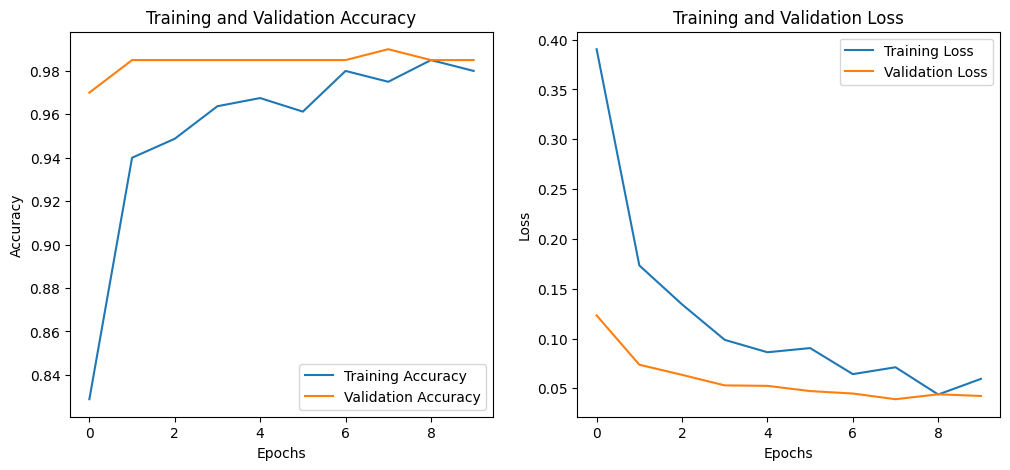

In [9]:
# Step 6: Visualize Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### However this model can perform more well on different dataset but the main agenda of this notebook is to provide you the implementation of this model

# ThankYou